In [508]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
sns.set(style='white', palette='muted',color_codes=True)
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import plotly.express as px

In [509]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder,MinMaxScaler 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor 
from sklearn.impute import SimpleImputer 
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error, confusion_matrix,recall_score

# REGRESSION

In [510]:
# data = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-3-insurance.csv')



In [511]:
# data.describe()

In [512]:
# data.isna().sum() * 100/len(data)

# data.duplicated().sum()
# data.drop_duplicates(subset=None, inplace=True,ignore_index=False,keep='first')
# data.duplicated().sum()

# data.to_csv('prac4.csv')

In [513]:
# data.describe()

In [514]:
# orig_val_sex = data.sex
# cat_val = ['sex','smoker', 'region']

# data[cat_val] = data[cat_val].apply(LabelEncoder().fit_transform)

# le_val_sex = data.sex 

# orig_dic_sex = np.unique(orig_val_sex)
# le_dic_sex = np.unique(le_val_sex)

# sex_dic = dict(zip(orig_dic_sex,le_dic_sex))
# # sex_dic

In [515]:
# data.corr()['charges'].sort_values(ascending=False)

In [516]:
# f,ax = plt.subplots(figsize=(10,8))

# ax.set_title('Data Correlation Matrix')

# data_corr = data.corr()

# sns.heatmap(data_corr, mask=np.zeros_like(data_corr, dtype=np.bool_), cmap=sns.diverging_palette(240,10, as_cmap=True), square=True, ax=ax)

In [517]:
# f,ax = plt.subplots(figsize=(10,8)) 

# sns.histplot(data.charges, color='b', ax=ax)

In [518]:
# f,ax = plt.subplots(figsize=(10,8)) 

# sns.boxplot(data.charges, color='b', ax=ax)

In [519]:
# f,ax = plt.subplots(figsize=(10,8))  

# ax.set_title('Charges to Male Table')

# sns.histplot(data[(data.sex == 1)]['charges'], color='g', ax=ax)

In [520]:
# x= data.drop(columns=['charges'], axis=1)
# y= data.charges

In [521]:
# scaler = StandardScaler()
# x = scaler.fit_transform(x)
# y = scaler.fit_transform(np.array(y).reshape(-1,1))

In [522]:
# x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [523]:
# linreg = LinearRegression()
# linreg.fit(x_train,y_train)

# y_pred = linreg.predict(x_test)

# lin_r2_test = r2_score(y_test,y_pred).round(3)
# lin_mse_test = mean_squared_error(y_test,y_pred).round(3)

# mod_perf = pd.DataFrame([ 
#     'LinearRegression', lin_r2_test,lin_mse_test
# ]).transpose()
# mod_perf.columns = ['Method', 'R2_Score Test', 'Mse Test']
# mod_perf


In [524]:
# ran_for = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42, criterion='squared_error')

# ran_for.fit(x_train,y_train)
# y_pred = ran_for.predict(x_test)
# ranfor_mse = mean_squared_error(y_test,y_pred).round(3)
# ranfor_r2 = r2_score(y_test,y_pred).round(3) 

# mode_perf = pd.DataFrame([ 
#     'RandomForestRegressor', ranfor_mse, ranfor_r2
# ]).transpose()
# mode_perf.columns =['Method', 'Mse Forest Test', 'R2 Forest Test']
# mode_perf




# CLASSIFICATION

In [525]:
df = pd.read_csv(r'c:\Github\Fullstack-Data-Analyst\Learning\the_data\data-lab-4-heart.csv')

In [526]:
df.isna().sum() * 100 /len(df)

df.duplicated().sum()
df.drop_duplicates(keep='first',subset=None,ignore_index=False,inplace=True)
df.duplicated().sum()

0

In [527]:
cat_val = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_val = ['age','trestbps','chol','thalach','oldpeak' ]

x = df.drop(columns=['target'], axis=1)


orig_sex_val = df.sex 



In [528]:
col_trans = ColumnTransformer([ 
    ('cat', OrdinalEncoder(), cat_val), ('num', StandardScaler(), num_val)
])
x = pd.DataFrame(col_trans.fit_transform(x))
y = df.target
x.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.949794,0.764066,-0.261285,0.018826,1.084022


In [529]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [530]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)

accu_scr = accuracy_score(y_test,y_pred).round(3)
mse_scr = mean_squared_error(y_test,y_pred).round(3)

mod_per = pd.DataFrame([ 
    'LogisticRegression', accu_scr, mse_scr
]).transpose()
mod_per.columns = ['Method', 'Accuracy Score', 'Mean Squared Error']
mod_per

,Method,Accuracy Score,Mean Squared Error
0,LogisticRegression,0.824,0.176


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted', ylabel='True Values'>

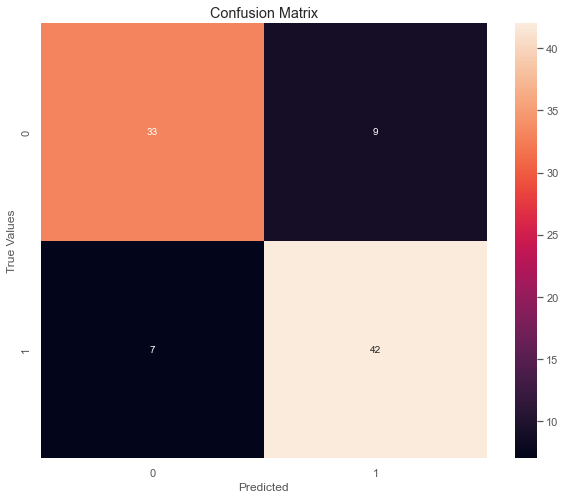

In [531]:
cm_dic = { 
    'y_test':y_test,
    'y_pred':y_pred
}

cm_cols = pd.DataFrame(cm_dic, columns=['y_test','y_pred'])
confusion_matrix = pd.crosstab(cm_cols['y_test'], cm_cols['y_pred'], rownames=['True Values'],colnames=['Predicted'])

f,ax = plt.subplots(figsize=(10,8))

ax.set_title('Confusion Matrix')
sns.heatmap(confusion_matrix,annot=True)

c:\Users\amunv\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

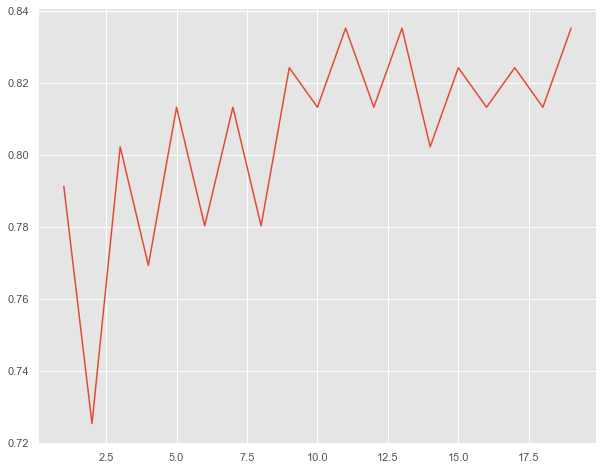

In [534]:
accuracies = []

for N in range(1,20):

    knn= KNeighborsClassifier(n_neighbors=N)
    knn.fit(x_train,y_train)

    y_pred = knn.predict(x_test)
    a_cu = accuracy_score(y_test,y_pred)

    accuracies.append(a_cu)
accuracies = np.array(accuracies)

f,ax = plt.subplots(figsize=(10,8))
sns.lineplot(np.arange(1,20),accuracies)

In [536]:
best_k = np.argmax(accuracies) 
best_accuracies = np.max(accuracies)

accu_per = pd.DataFrame([ 
    'KNeighborsClassifier', best_k, best_accuracies
]).transpose()

accu_per.columns = ['Method', 'Best K Value', 'Best Accuracy']
accu_per

,Method,Best K Value,Best Accuracy
0,KNeighborsClassifier,10,0.835165
